In [604]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# cleaning

In [607]:
protein_one = pd.read_csv('/Users/jonathanfarro/Desktop/animal-protein-consumption.csv')

life_ex = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/life-expectancy-hmd-unwpp.csv')

usa_pricing = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/average_prices_for_food.csv')

daily_cals = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv')

fruit_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/fruit-consumption-per-capita.csv')

veg_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/vegetable-consumption-per-capita/vegetable-consumption-per-capita.csv' )

nutrition =  pd.read_excel('/Users/jonathanfarro/Desktop/ Capstone Files/food_comp.xlsx')

protein_per_GDP = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-per-capita-protein-supply-vs-gdp-per-capita.csv')

death = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/death-rate-by-cause-who-mdb.csv')



In [608]:
# rename columns to something easier to work with 

protein = protein_one.rename(columns={
                        protein_one.columns[3]:'fish',
                        protein_one.columns[4]:'poultry',
                        protein_one.columns[5]:'pork',
                        protein_one.columns[6]:'beef',
                        protein_one.columns[7]:'sheep/goat',
                        protein_one.columns[8]:'other',
                        protein_one.columns[9]:'eggs',
                        protein_one.columns[10]:'milk'
                       })

In [609]:
# bulk clean up 
protein = protein.rename(columns=lambda x: x.lower())
protein = protein.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)

life_ex = life_ex.rename(columns = lambda x: x.lower())
life_ex = life_ex.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
life_ex = life_ex.rename(columns = {life_ex.columns[3] : 'life_expectancy(0)'})

protein_per_GDP = protein_per_GDP.rename(columns = lambda x: x.lower())
protein_per_GDP = protein_per_GDP.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
gdp_population = protein_per_GDP.drop(columns= {protein_per_GDP.columns[3],protein_per_GDP.columns[6]})
gdp_population = gdp_population.rename(columns = { gdp_population.columns[3]: 'gdp_per_capita'}) 


daily_cals = daily_cals.rename(columns = lambda x: x.lower())
daily_cals = daily_cals.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

death = death.rename(columns = lambda x: x.lower())
death = death.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

nutrition = nutrition.rename(columns = lambda x: x.lower())
nutrition = nutrition.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

fruit_per_cap = fruit_per_cap.rename(columns=lambda x: x.lower())
fruit_per_cap = fruit_per_cap.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
fruit = fruit_per_cap.rename(columns = {fruit_per_cap.columns[3]:'fruit_kilo_yearly'}).reset_index(drop = True)


In [610]:
# creating a new column to show total_protein intake for a day.
protein['total_protein'] = protein.iloc[:, 3:11].sum(axis = 1).round(2)

In [611]:
fruit_per_cap = fruit_per_cap.rename(columns=lambda x: x.lower())
fruit_per_cap = fruit_per_cap.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
fruit = fruit_per_cap.rename(columns = {fruit_per_cap.columns[3]:'fruit_kilo_yearly'}).reset_index(drop = True)

In [612]:
capstone = pd.merge(protein,
         life_ex,
         on= ['entity','code','year'],
         how= 'inner')

capstone.head()

,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,life_expectancy(0)
0,afghanistan,afg,1961,0.010186,0.224101,NaN,2.027096,3.167975,0.366711,0.285220,6.346136,12.43,33.2910
1,afghanistan,afg,1962,0.010193,0.234435,NaN,2.109914,3.068040,0.377134,0.305785,6.268587,12.37,33.7565
2,afghanistan,afg,1963,0.010199,0.234585,NaN,2.131660,3.131195,0.458970,0.305980,6.813153,13.09,34.2008
3,afghanistan,afg,1964,0.010205,0.244912,NaN,2.122574,3.224680,0.438801,0.316345,6.857546,13.22,34.6726
4,afghanistan,afg,1965,0.010209,0.255223,NaN,2.103040,3.338321,0.469611,0.326686,7.319804,13.82,35.1245


In [613]:
capstone_2 = pd.merge( capstone, gdp_population, on = ['entity','code','year'],how= 'inner')

main_frame = pd.merge(capstone_2,death,  on = ['entity','code','year'],how= 'outer')

final_frame = pd.merge(main_frame, daily_cals,  on = ['entity','code','year'],how= 'outer')

final_frame['total_daily_protein']=final_frame.iloc[:, 3:10].sum(axis=1)

final_frame = final_frame.rename(columns= { 'daily calorie supply per person that comes from animal protein':'daily_cal_animal_protein',
                              'daily calorie supply per person that comes from vegetal protein':'daily_cal_veg_protein',
                              'daily calorie supply per person from fat':'daily_cal_fat',
                              'daily calorie supply per person from carbohydrates':'daily_cal_carbs'})
final_frame

,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,...,"age-standardized deaths from digestive diseases in both sexes per 100,000 people","age-standardized deaths from unintentional injuries in both sexes per 100,000 people","age-standardized deaths from intentional injuries in both sexes per 100,000 people","age-standardized deaths from neuropsychiatric conditions in both sexes per 100,000 people","age-standardized deaths from respiratory diseases in both sexes per 100,000 people",daily_cal_animal_protein,daily_cal_veg_protein,daily_cal_fat,daily_cal_carbs,total_daily_protein
0,afghanistan,afg,1961,0.010186,0.224101,NaN,2.027096,3.167975,0.366711,0.285220,...,NaN,NaN,NaN,NaN,NaN,55.128870,290.842470,343.88312,2365.0508,6.081289
1,afghanistan,afg,1962,0.010193,0.234435,NaN,2.109914,3.068040,0.377134,0.305785,...,NaN,NaN,NaN,NaN,NaN,54.959705,283.360500,345.01690,2289.9097,6.105502
2,afghanistan,afg,1963,0.010199,0.234585,NaN,2.131660,3.131195,0.458970,0.305980,...,NaN,NaN,NaN,NaN,NaN,57.932200,256.696780,354.04938,2083.1013,6.272589
3,afghanistan,afg,1964,0.010205,0.244912,NaN,2.122574,3.224680,0.438801,0.316345,...,NaN,NaN,NaN,NaN,NaN,58.493233,282.302340,357.72510,2314.9219,6.357517
4,afghanistan,afg,1965,0.010209,0.255223,NaN,2.103040,3.338321,0.469611,0.326686,...,NaN,NaN,NaN,NaN,NaN,61.008570,281.439820,365.04077,2310.2708,6.503089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13403,zimbabwe,zwe,2017,1.140000,2.300000,0.29,17.309998,0.900000,1.270000,0.410000,...,NaN,NaN,NaN,NaN,NaN,105.919990,116.799995,589.76990,1233.5099,23.619997
13404,zimbabwe,zwe,2018,0.769999,1.979999,0.20,17.139986,0.899999,1.209999,0.420000,...,NaN,NaN,NaN,NaN,NaN,101.919920,115.679920,603.26953,1245.1292,22.619982
13405,zimbabwe,zwe,2019,0.500000,2.020001,0.27,17.130005,0.880000,1.200000,0.390000,...,NaN,NaN,NaN,NaN,NaN,100.560030,115.280030,577.17010,1231.9905,22.390006
13406,zimbabwe,zwe,2020,0.490000,3.250001,0.25,16.770008,0.870000,1.150000,0.340000,...,NaN,NaN,NaN,NaN,NaN,111.960045,114.200050,623.25024,1164.5505,23.120011


In [614]:
#creating an all_cause_mortality column, and more cleaning

In [615]:
final_frame['all_cause_per_100k'] = final_frame.iloc[:,15:24].sum(axis=1)

final_frame_two = final_frame.drop(columns=final_frame.columns[15:24])

final_frame_three = final_frame_two[~final_frame_two['entity'].str.contains(r'\(.*\)')]

final = final_frame_three
final = final.rename(columns={'life_expectancy(0)':'life_exp','population (historical)':'population'})

In [616]:
#further cleaning.

non_countries_list = ['asia','europe','high-income countries','low-income countries','lower-middle-income countries','oceania','upper-middle-income countries','world']
income_classes= ['low-income countries','high-income countries','lower-middle-income countries','upper-middle-income countries','world']

final_countries = final.loc[~final['entity'].isin(non_countries_list)]
income_class = final.loc[final['entity'].isin(income_classes)]



testdrop= final_countries

df = testdrop.dropna()



# What years are covered in this dataset?

In [628]:
df.year.sort_values().unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

# top 3 countires that have eaten the MOST protein rich diets from 1990-2021?

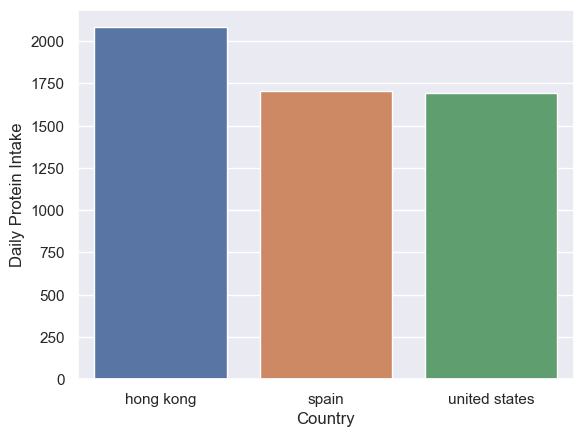

In [665]:
top_three_most_protein = df.groupby(['entity']) \
                                   .agg({'total_daily_protein': 'sum','life_exp':'max','gdp_per_capita': 'mean'}) \
                                   .sort_values(by='total_daily_protein', ascending=False) \
                                   .head(3)\
                                   .reset_index() 

top_three_most_protein = top_three_most_protein.sort_values(by='life_exp',ascending=False)
   
sns.barplot(top_three_most_protein,x = 'entity',y='total_daily_protein',hue='entity')
plt.xlabel('Country')
plt.ylabel('Daily Protein Intake');



# what countries have eaten the LEAST protein rich diets over these years?

In [637]:
bottom_three_least_protein.sort_values(by='life_exp',ascending = False)

,entity,total_daily_protein,life_exp,gdp_per_capita
0,bhutan,10.039871,72.4482,11595.684000
1,burundi,23.979995,62.5694,772.873190
2,democratic republic of congo,36.849998,60.4283,988.326127


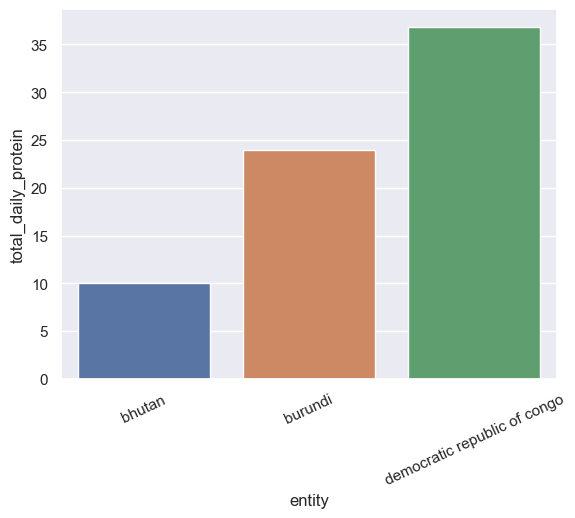

In [639]:
bottom_three_least_protein = df.groupby(['entity']) \
                                   .agg({'total_daily_protein': 'sum','life_exp':'max','gdp_per_capita': 'mean'}) \
                                   .sort_values(by='total_daily_protein', ascending=True) \
                                   .head(3) \
                                   .reset_index()                      

   
sns.barplot(bottom_five_total_protein,x = 'entity',y='total_daily_protein',hue='entity')
plt.xticks(rotation = 25);

## top 3 countries who derive protein mainly from animal sources.

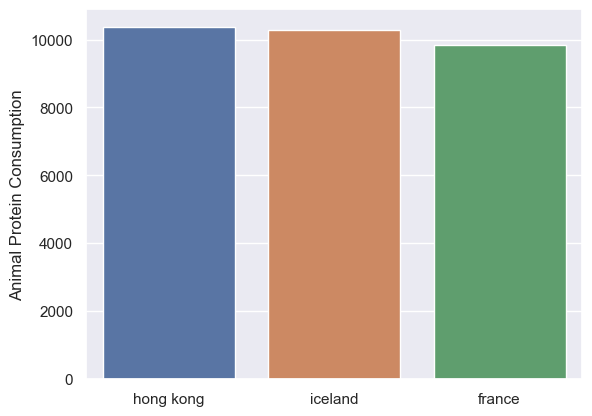

In [659]:
animal_protein = df.groupby(['entity']).agg({
    'daily_cal_animal_protein':'sum'}).sort_values(by='daily_cal_animal_protein',ascending = False).head(3).reset_index()
sns.barplot(animal_protein,x = 'entity',y='daily_cal_animal_protein',hue='entity')
plt.xlabel('')
plt.ylabel('Animal Protein Consumption');

# how does life expectancy compare beteween top and bottom veg/animal protein? 

In [645]:
average_life_exp_animal_protein = median_life.loc[median_life['entity'].isin(animal_heavy_list)]


In [651]:
average_life_exp_veg_protein = median_life.loc[median_life['entity'].isin(veg_heavy_list)].reset_index(drop=True)
average_life_exp_veg_protein

,entity,life_exp
0,egypt,67.828597
1,morocco,68.861391
2,turkey,73.271809


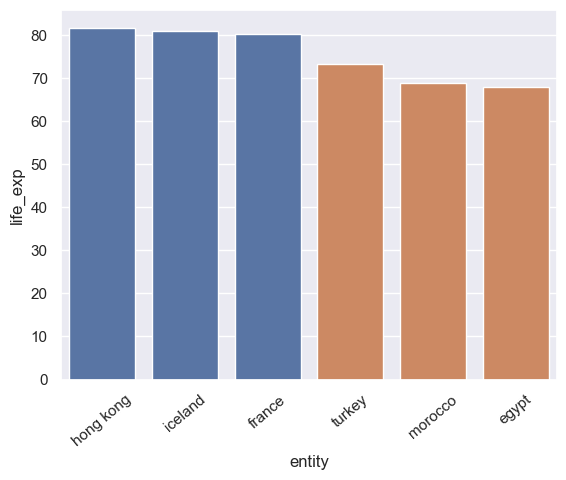

In [663]:
sns.barplot(average_life_exp_animal_protein.sort_values(by='life_exp',ascending=False),x='entity',y='life_exp')
sns.barplot(average_life_exp_veg_protein.sort_values(by='life_exp',ascending=False),x='entity',y='life_exp')
plt.xticks(rotation=40);


# top 3 countries who derive protein from mainly veg 

In [404]:
veg_pro = df.groupby(['entity']).agg({
    'daily_cal_veg_protein':'sum'}).sort_values(by='daily_cal_veg_protein',ascending = False).head(3).reset_index()


veg_pro

,entity,daily_cal_veg_protein
0,turkey,9479.16026
1,morocco,8879.39381
2,egypt,8825.47395


In [406]:
veg_heavy_list = veg_pro.entity.to_list()
animal_heavy_list = animal_protein.entity.to_list()
animal_heavy_list

['hong kong', 'iceland', 'france']

# correlation

In [120]:
correlations = df.iloc[:,2:21].corr()
correlations

,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,life_exp,gdp_per_capita,population,daily_cal_animal_protein,daily_cal_veg_protein,daily_cal_fat,daily_cal_carbs,total_daily_protein,all_cause_per_100k
year,1.000000,0.050784,0.338128,0.158544,-0.032156,0.022159,0.026152,0.143664,0.101006,0.204962,0.261488,0.141621,0.019025,0.198323,0.219707,0.181857,0.187283,0.226223,-0.110611
fish,0.050784,1.000000,0.286960,0.234422,-0.014319,-0.022282,0.041409,0.244237,0.037839,0.436894,0.341615,0.327370,-0.019772,0.428940,-0.185455,0.251148,-0.010642,0.577470,0.015573
poultry,0.338128,0.286960,1.000000,0.358080,0.293943,-0.011585,-0.064554,0.408673,0.298001,0.666489,0.553580,0.469318,-0.071932,0.657753,-0.117184,0.528425,0.047062,0.751971,0.229205
pork,0.158544,0.234422,0.358080,1.000000,0.276256,-0.114068,0.011063,0.658396,0.558159,0.722453,0.594695,0.655788,0.031686,0.724854,-0.108171,0.721624,0.035037,0.688906,0.333500
beef,-0.032156,-0.014319,0.293943,0.276256,1.000000,0.235540,0.031776,0.403070,0.506532,0.597062,0.399801,0.459117,-0.066379,0.604650,-0.103990,0.558507,-0.012959,0.545051,0.327880
sheep/goat,0.022159,-0.022282,-0.011585,-0.114068,0.235540,1.000000,0.247090,-0.034931,0.189746,0.203386,0.068570,0.058875,-0.063582,0.219747,0.053591,0.166843,-0.107351,0.176436,0.009545
other,0.026152,0.041409,-0.064554,0.011063,0.031776,0.247090,1.000000,-0.092428,0.020438,0.107141,-0.079835,0.050571,-0.067602,0.113151,-0.165299,0.030488,-0.153404,0.135628,-0.114305
eggs,0.143664,0.244237,0.408673,0.658396,0.403070,-0.034931,-0.092428,1.000000,0.588929,0.720323,0.709299,0.647472,0.120810,0.720638,0.057796,0.711415,0.239770,0.669477,0.458341
milk,0.101006,0.037839,0.298001,0.558159,0.506532,0.189746,0.020438,0.588929,1.000000,0.789894,0.648514,0.613663,-0.075715,0.787138,0.044322,0.772031,0.168529,0.544022,0.495001
total_protein,0.204962,0.436894,0.666489,0.722453,0.597062,0.203386,0.107141,0.720323,0.789894,1.000000,0.787266,0.774416,-0.064629,0.998367,-0.115770,0.883975,0.078730,0.944275,0.437531


In [121]:
nutrition.iloc[:,2:20].corr()

,water_(g),energ_kcal,protein_(g),lipid_tot_(g),ash_(g),carbohydrt_(g),fiber_td_(g),sugar_tot_(g),calcium_(mg),iron_(mg),magnesium_(mg),phosphorus_(mg),potassium_(mg),sodium_(mg),zinc_(mg),copper_mg),manganese_(mg),selenium_(µg)
water_(g),1.000000,-0.900554,-0.103979,-0.489781,-0.281244,-0.773920,-0.394281,-0.506365,-0.263806,-0.353255,-0.402719,-0.288052,-0.198637,-0.156234,-0.152804,-0.177720,-0.091474,-0.092437
energ_kcal,-0.900554,1.000000,0.112636,0.806677,0.114172,0.493028,0.204450,0.351313,0.143632,0.199372,0.266927,0.192235,0.076704,0.055515,0.115431,0.129945,0.054017,0.084681
protein_(g),-0.103979,0.112636,1.000000,0.062336,0.096528,-0.304295,-0.081145,-0.302557,0.038643,0.124599,0.205562,0.431661,0.241563,-0.003324,0.415215,0.138486,0.028552,0.373077
lipid_tot_(g),-0.489781,0.806677,0.062336,1.000000,0.004215,-0.048594,-0.027475,-0.002315,0.023242,-0.035869,0.079278,0.064726,-0.042312,0.011321,0.029295,0.057307,0.005185,0.037718
ash_(g),-0.281244,0.114172,0.096528,0.004215,1.000000,0.161640,0.190849,0.029238,0.483594,0.201200,0.289904,0.468383,0.384198,0.825681,0.081448,0.098646,0.067068,0.058911
carbohydrt_(g),-0.773920,0.493028,-0.304295,-0.048594,0.161640,1.000000,0.466204,0.678416,0.214085,0.348522,0.295987,0.072836,0.117583,0.073636,-0.012193,0.098380,0.079730,-0.079519
fiber_td_(g),-0.394281,0.204450,-0.081145,-0.027475,0.190849,0.466204,1.000000,0.120625,0.239417,0.391225,0.591633,0.162620,0.337455,0.007791,0.083333,0.213778,0.120973,-0.019327
sugar_tot_(g),-0.506365,0.351313,-0.302557,-0.002315,0.029238,0.678416,0.120625,1.000000,0.154179,0.132131,0.080979,-0.051407,0.010857,-0.004457,-0.036536,0.028719,0.019813,-0.129425
calcium_(mg),-0.263806,0.143632,0.038643,0.023242,0.483594,0.214085,0.239417,0.154179,1.000000,0.355907,0.313933,0.578628,0.254283,0.178618,0.138809,0.083766,0.074454,0.007622
iron_(mg),-0.353255,0.199372,0.124599,-0.035869,0.201200,0.348522,0.391225,0.132131,0.355907,1.000000,0.403379,0.211132,0.230510,0.030207,0.389234,0.208525,0.124222,0.092436


# who in our world, on average, lives the longest?

In [421]:
avg_life_exp = df.groupby(['entity']) \
                                   .agg({'life_exp': 'max'}) \
                                   .reset_index() 

avg_life_exp = avg_life_exp.sort_values(by='life_exp',ascending = False).reset_index(drop=True)

top_3_life_exp = avg_life_exp.head(3)
bottom_life_exp = avg_life_exp.tail(3)

In [423]:
long_life_list = top_3_life_exp .entity.to_list()
long_life_list

['hong kong', 'japan', 'macao']

In [431]:
long_life = final.loc[final['entity'].isin(long_life_list)]

In [561]:
long_life = long_life.groupby('entity').agg({'life_exp':'mean','total_daily_protein':'mean','daily_cal_animal_protein':'mean','daily_cal_veg_protein':'mean','gdp_per_capita':'mean'}).reset_index().round(2)

# who in our world live the shortest?

In [483]:
shortest_life

,entity,life_exp,total_daily_protein,daily_cal_animal_protein,daily_cal_veg_protein,gdp_per_capita
0,central african republic,46.56,14.97,71.08,117.09,994.02
1,chad,49.34,13.07,67.93,199.81,1355.80
2,nigeria,49.31,7.10,32.57,205.62,4056.42


In [441]:
short_list = df.groupby(['entity']) \
                                   .agg({'life_exp': 'max'}) \
                                   .sort_values(by='life_exp', ascending=True) \
                                   .head(3) \
                                   .reset_index() 

short_list = short_list.entity.to_list()

In [443]:
shorter_life = df.loc[df['entity'].isin(short_list)]

In [457]:
shortest_life = shorter_life.groupby('entity').agg({'life_exp':'mean','total_daily_protein':'mean','daily_cal_animal_protein':'mean','daily_cal_veg_protein':'mean','gdp_per_capita':'mean'}).reset_index().round(2)

# comparing lifespan of top 3 and bottom 3 protein consumption 

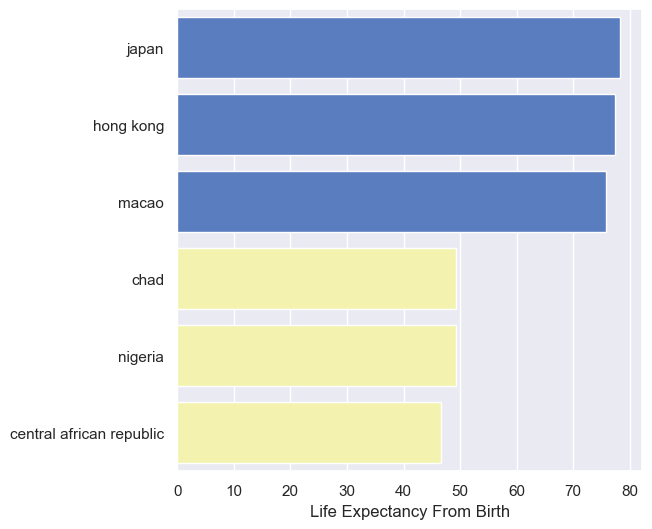

In [668]:
sns.set_color_codes("muted")
plt.figure(figsize=(6, 6))
sns.barplot(data=long_life.sort_values(by='life_exp',ascending=False),x='life_exp',y='entity',orient="h",color='b')

sns.set_color_codes("pastel")
sns.barplot(data=shortest_life.sort_values(by='life_exp',ascending=False),x='life_exp',y='entity',orient="h",color='y')
plt.xlabel('Life Expectancy From Birth')
plt.ylabel('');

# how has protein consumption changed over the years? 

In [1407]:
protein_consumption_time

,total_daily_protein,gdp_per_capita,life_exp
year,,,
1990,62.014263,12563.502153,64.442109
1991,56.914866,12583.876734,64.738903
1992,54.257508,12286.072145,65.023385
1993,51.076246,12212.205922,65.033564
1994,55.416561,12328.842242,64.989537
1995,57.003516,12831.040315,65.706829
1996,55.621932,13156.610780,65.977680
1997,56.060691,13528.814276,66.154139
1998,57.666866,13795.538647,66.346997


  # total calories derived from veg vs animal protein 

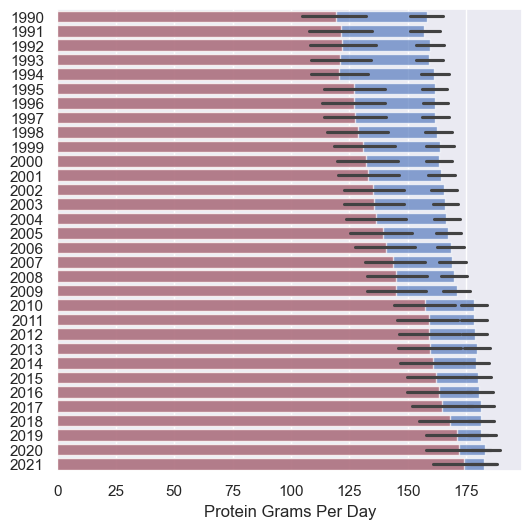

In [1324]:
sns.set_color_codes("muted")
plt.figure(figsize=(6, 6))
sns.color_palette("Spectral", as_cmap=True)
sns.barplot(df,x='daily_cal_veg_protein',y='year',orient='h',alpha=0.7,color='b')
sns.barplot(df,x='daily_cal_animal_protein',y='year',orient='h',alpha=0.7,color='r')

plt.xlabel('Protein Grams Per Day')
plt.ylabel('');

#  total protein consumption over the years 

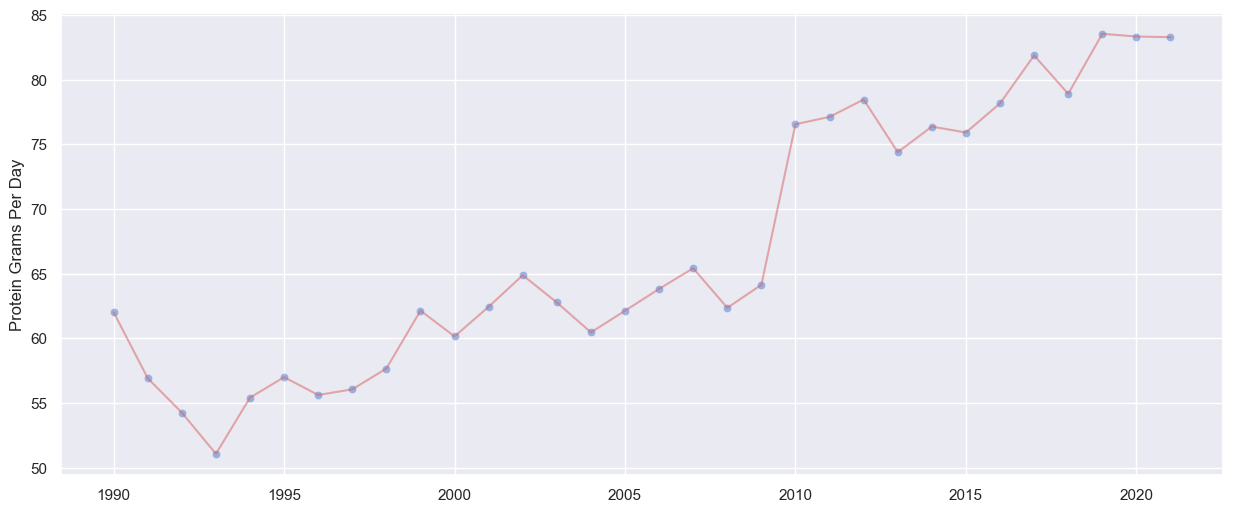

In [1302]:
#total protein consumption over the years 

sns.set_color_codes("muted")
plt.figure(figsize=(15, 6))
sns.lineplot(protein_consumption_time,x='year',y='total_daily_protein',color='r',alpha=0.5)
sns.scatterplot(protein_consumption_time,x='year',y='total_daily_protein',color='b',alpha=0.5)


plt.xlabel('')
plt.ylabel('Protein Grams Per Day');

In [1397]:
life_time = df.groupby('year').agg({'life_exp':'mean'}).sort_values(by='life_exp') 
life_time = life_time.sort_values(by='year')

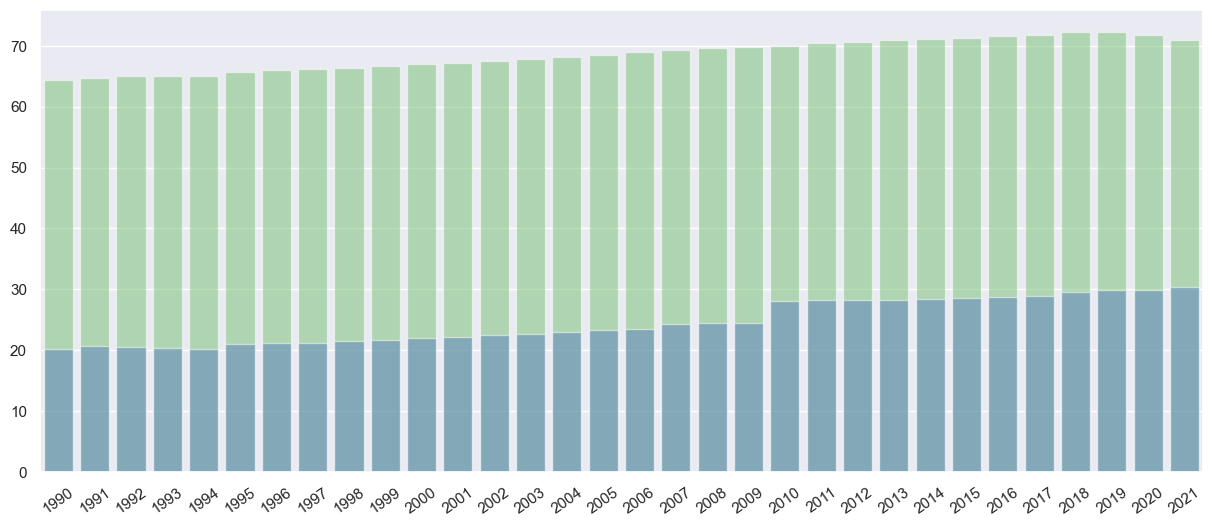

In [1399]:
sns.set_color_codes("muted")
plt.figure(figsize=(15, 6))
sns.barplot(life_time,x='year',y='life_exp',color='g',alpha=0.5)
sns.barplot(protein_consumption_time,x='year',y='total_daily_protein',color='b',alpha=0.5)


plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 35);

# ranking the worlds favorite protein sources.

In [864]:
protein_sources_sum = df.iloc[:,3:11].sum().round().to_frame().reset_index()

In [866]:
ranking_proteins = protein_sources_sum.rename(columns={protein_sources_sum.columns[0]:'protein_type',
                                                       protein_sources_sum.columns[1]:'sum_of_consumption'})

In [868]:
ranking_proteins['rank'] = ranking_proteins['sum_of_consumption'].rank(ascending=False)

In [874]:
ranking_proteins = ranking_proteins.sort_values(by='rank',ascending= True).reset_index(drop=True)

In [876]:
ranking_proteins.columns

Index(['protein_type', 'sum_of_consumption', 'rank'], dtype='object')

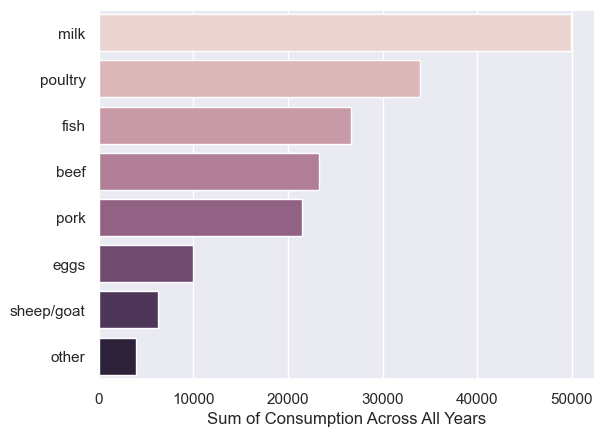

In [890]:
sns.barplot(ranking_proteins,x='sum_of_consumption',y='protein_type',orient='h',hue='rank',legend=False)
plt.xlabel('Sum of Consumption Across All Years')
plt.ylabel('');

In [918]:
below_the_average_milk_enjoyer = df.loc[df['milk'] < df.milk.mean()]

In [916]:
above_average_milk_enjoyer = df.loc[df['milk'] > df.milk.mean()]

In [1101]:
least_milky_list = below_the_average_milk_enjoyer.entity.unique().tolist()
least_milky_countries = df.loc[df['entity'].isin(least_milky_list)]
                                                
non_milk = least_milky_countries.groupby('entity').agg({'milk':'mean','gdp_per_capita':'max','life_exp':'mean'}).sort_values(by='milk',ascending=True).head(3)

In [943]:
milky_list = above_average_milk_enjoyer.entity.unique()

In [953]:
most_milk_list = milky_list.tolist()

In [1099]:
milk = milkiest_countries.groupby('entity').agg({'milk':'mean','gdp_per_capita':'max','life_exp':'mean'}).sort_values(by='milk',ascending=False).head(3)

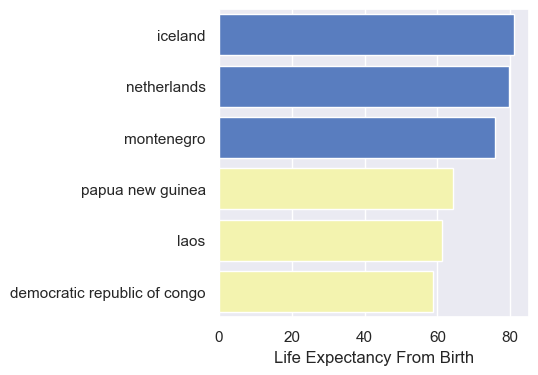

In [1115]:
sns.set_color_codes("muted")
plt.figure(figsize=(4, 4))
sns.barplot(data=milk.sort_values(by='life_exp',ascending=False),x='life_exp',y='entity',orient="h",color='b')

sns.set_color_codes("pastel")
sns.barplot(data=non_milk.sort_values(by='life_exp',ascending=False),x='life_exp',y='entity',orient="h",color='y')
plt.xlabel('Life Expectancy From Birth')
plt.ylabel('');

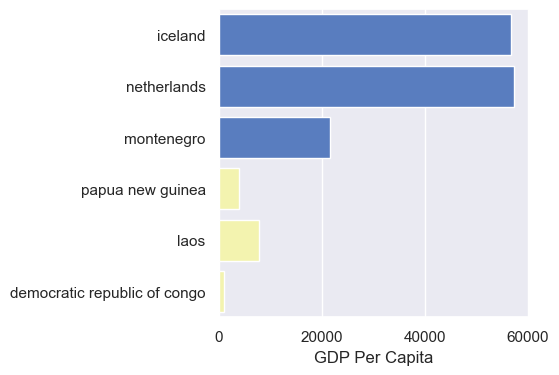

In [1113]:
sns.set_color_codes("muted")
plt.figure(figsize=(4, 4))
sns.barplot(data=milk.sort_values(by='life_exp',ascending=False),x='gdp_per_capita',y='entity',orient="h",color='b')

sns.set_color_codes("pastel")
sns.barplot(data=non_milk.sort_values(by='life_exp',ascending=False),x='gdp_per_capita',y='entity',orient="h",color='y')
plt.xlabel('GDP Per Capita')
plt.ylabel('');

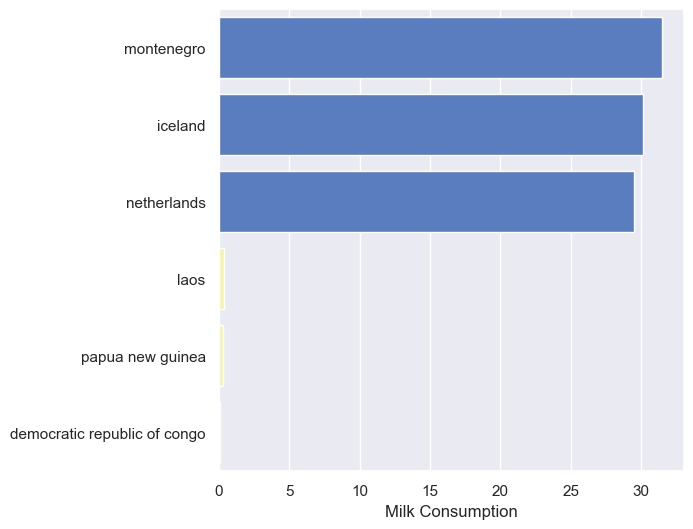

In [1119]:
sns.set_color_codes("muted")
plt.figure(figsize=(6, 6))
sns.barplot(data=milk.sort_values(by='milk',ascending=False),x='milk',y='entity',orient="h",color='b')

sns.set_color_codes("pastel")
sns.barplot(data=non_milk.sort_values(by='milk',ascending=False),x='milk',y='entity',orient="h",color='y')
plt.xlabel('Milk Consumption')
plt.ylabel('');